<a href="https://colab.research.google.com/github/priyankajonnalagadda/Crypto-volatility-risk-analyzer/blob/main/crypto_volatility_team_A_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas numpy matplotlib --quiet


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


In [3]:
coins = ["BTC-USD", "ETH-USD", "SOL-USD"]

raw = yf.download(
    coins,
    period="1y",
    interval="1d",
    group_by="ticker",
    progress=False
)

raw.head()


/tmp/ipython-input-702633869.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(


Ticker          ETH-USD                                                      \
Price              Open         High          Low        Close       Volume   
Date                                                                          
2025-02-04  2883.818359  2888.250000  2636.165771  2735.051270  48795275985   
2025-02-05  2735.225830  2824.400146  2701.104980  2787.779053  31960764447   
2025-02-06  2787.658691  2857.142090  2662.445801  2688.400879  29500645692   
2025-02-07  2688.897461  2798.028809  2564.968262  2622.211182  29526663418   
2025-02-08  2623.001953  2665.484619  2591.778564  2632.308350  17059263074   

Ticker         SOL-USD                                                  \
Price             Open        High         Low       Close      Volume   
Date                                                                     
2025-02-04  216.150513  219.995880  202.848846  207.091980  7328632702   
2025-02-05  207.077103  209.318756  195.390579  195.988144  3826498437   
2025-02-06  195.986389  203.887817  188.165527  189.772491  3936545265   
2025-02-07  189.757706  203.150528  188.480743  192.204651  4593806344   
2025-02-08  192.202545  200.831970  190.128769  199.599899  2387525186   

Ticker            BTC-USD                                             \
Price                Open           High           Low         Close   
Date                                                                   
2025-02-04  101398.718750  101745.617188  96208.109375  97871.820312   
2025-02-05   97878.007812   99113.210938  96174.828125  96615.445312   
2025-02-06   96610.640625   99168.609375  95707.351562  96593.296875   
2025-02-07   96581.320312  100154.140625  95653.882812  96529.085938   
2025-02-08   96533.257812   96877.804688  95702.492188  96482.453125   

Ticker                   
Price            Volume  
Date                     
2025-02-04  73002130211  
2025-02-05  49125911241  
2025-02-06  45302471947  
2025-02-07  55741290456  
2025-02-08  22447526395

In [4]:
frames = []

for coin in coins:
    df = raw[coin].copy()
    df.reset_index(inplace=True)
    df["Coin"] = coin.replace("-USD", "")
    frames.append(df)

crypto_df = pd.concat(frames, ignore_index=True)

crypto_df = crypto_df[["Date", "Open", "High", "Low", "Close", "Volume", "Coin"]]

crypto_df.head()


Price,Date,Open,High,Low,Close,Volume,Coin
0,2025-02-04,101398.718750,101745.617188,96208.109375,97871.820312,73002130211,BTC
1,2025-02-05,97878.007812,99113.210938,96174.828125,96615.445312,49125911241,BTC
2,2025-02-06,96610.640625,99168.609375,95707.351562,96593.296875,45302471947,BTC
3,2025-02-07,96581.320312,100154.140625,95653.882812,96529.085938,55741290456,BTC
4,2025-02-08,96533.257812,96877.804688,95702.492188,96482.453125,22447526395,BTC


In [5]:
crypto_df["Daily_Return"] = crypto_df.groupby("Coin")["Close"].pct_change()
crypto_df.dropna(inplace=True)

crypto_df.head()


Price,Date,Open,High,Low,Close,Volume,Coin,Daily_Return
1,2025-02-05,97878.007812,99113.210938,96174.828125,96615.445312,49125911241,BTC,-0.012837
2,2025-02-06,96610.640625,99168.609375,95707.351562,96593.296875,45302471947,BTC,-0.000229
3,2025-02-07,96581.320312,100154.140625,95653.882812,96529.085938,55741290456,BTC,-0.000665
4,2025-02-08,96533.257812,96877.804688,95702.492188,96482.453125,22447526395,BTC,-0.000483
5,2025-02-09,96481.312500,97325.281250,94745.257812,96500.093750,27732901800,BTC,0.000183


In [6]:
crypto_df["Volatility"] = (
    crypto_df.groupby("Coin")["Daily_Return"]
    .rolling(window=7)
    .std()
    .reset_index(level=0, drop=True)
)

crypto_df.dropna(inplace=True)
crypto_df.head()


Price,Date,Open,High,Low,Close,Volume,Coin,Daily_Return,Volatility
7,2025-02-11,97438.132812,98492.898438,94875.039062,95747.429688,37488783272,BTC,-0.017346,0.009072
8,2025-02-12,95745.695312,98151.023438,94101.203125,97885.859375,49340445530,BTC,0.022334,0.012033
9,2025-02-13,97888.750000,98111.085938,95269.710938,96623.867188,37147280860,BTC,-0.012892,0.013297
10,2025-02-14,96623.367188,98819.468750,96342.804688,97508.968750,32697987277,BTC,0.009160,0.013712
11,2025-02-15,97508.382812,97975.039062,97240.195312,97580.351562,17047266288,BTC,0.000732,0.013690


In [ ]:
crypto_df["Volatility_Level"] = pd.qcut(
    crypto_df["Volatility"],
    q=3,
    labels=["Low", "Medium", "High"]
)

crypto_df["Volatility_Level"].value_counts()


,count
Volatility_Level,
Low,358
Medium,358
High,358


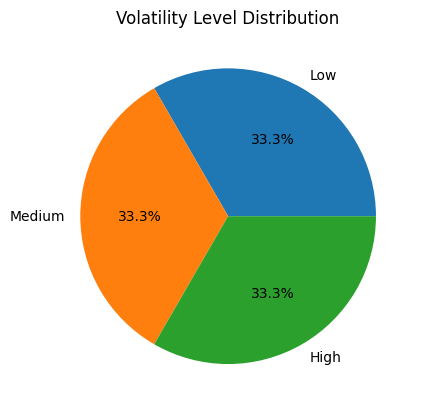

In [ ]:
counts = crypto_df["Volatility_Level"].value_counts()

plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Volatility Level Distribution")
plt.show()


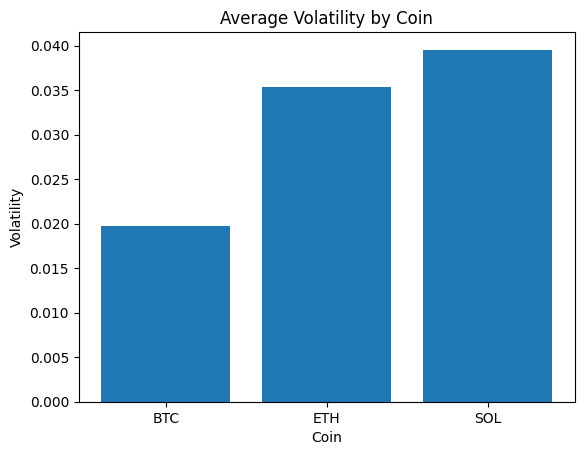

In [ ]:
avg_vol = crypto_df.groupby("Coin")["Volatility"].mean()

plt.bar(avg_vol.index, avg_vol.values)
plt.title("Average Volatility by Coin")
plt.xlabel("Coin")
plt.ylabel("Volatility")
plt.show()


In [ ]:
summary = crypto_df.groupby("Coin").agg(
    Avg_Volatility=("Volatility", "mean"),
    Max_Volatility=("Volatility", "max"),
    High_Vol_Days=("Volatility_Level", lambda x: (x == "High").sum())
)

summary


,Avg_Volatility,Max_Volatility,High_Vol_Days
Coin,,,
BTC,0.019778,0.057774,25
ETH,0.035396,0.088404,149
SOL,0.039535,0.136341,184


In [ ]:
# Normalize volatility into 0–100 risk score
v_min = crypto_df["Volatility"].min()
v_max = crypto_df["Volatility"].max()

crypto_df["Risk_Score"] = (
    (crypto_df["Volatility"] - v_min) / (v_max - v_min) * 100
)

# Risk category
def risk_category(score):
    if score < 33:
        return "Low Risk"
    elif score < 66:
        return "Medium Risk"
    else:
        return "High Risk"

crypto_df["Risk_Category"] = crypto_df["Risk_Score"].apply(risk_category)

crypto_df[["Coin", "Volatility", "Risk_Score", "Risk_Category"]].head()


Price,Coin,Volatility,Risk_Score,Risk_Category
7,BTC,0.009072,2.746983,Low Risk
8,BTC,0.012033,5.009927,Low Risk
9,BTC,0.013297,5.975953,Low Risk
10,BTC,0.013712,6.293319,Low Risk
11,BTC,0.013690,6.276526,Low Risk


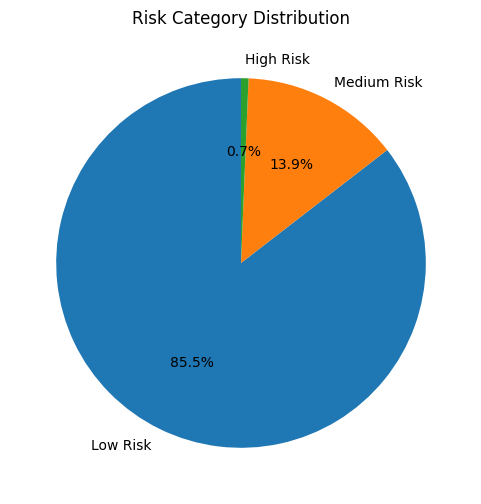

In [ ]:
risk_counts = crypto_df["Risk_Category"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    risk_counts.values,
    labels=risk_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Risk Category Distribution")
plt.show()


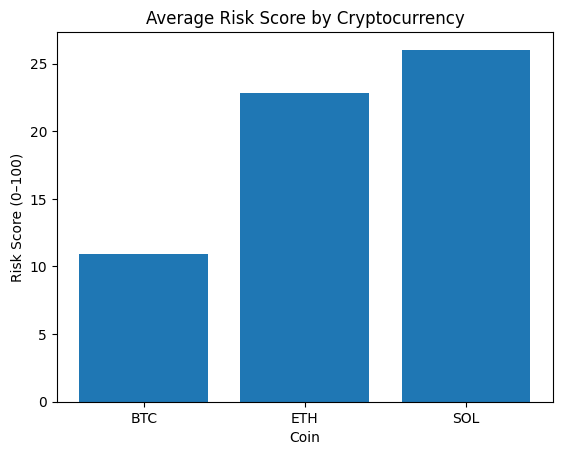

In [ ]:
avg_risk = crypto_df.groupby("Coin")["Risk_Score"].mean()

plt.figure()
plt.bar(avg_risk.index, avg_risk.values)
plt.title("Average Risk Score by Cryptocurrency")
plt.xlabel("Coin")
plt.ylabel("Risk Score (0–100)")
plt.show()


In [ ]:
final_summary = crypto_df.groupby("Coin").agg(
    Avg_Volatility=("Volatility", "mean"),
    Avg_Risk_Score=("Risk_Score", "mean"),
    Dominant_Risk=("Risk_Category", lambda x: x.mode()[0])
).reset_index()

final_summary


,Coin,Avg_Volatility,Avg_Risk_Score,Dominant_Risk
0,BTC,0.019778,10.928252,Low Risk
1,ETH,0.035396,22.862744,Low Risk
2,SOL,0.039535,26.025631,Low Risk


In [ ]:
import pandas as pd
import numpy as np

crypto_df = crypto_df.copy()

def risk_trend_from_score(score):
    if score >= 70:
        return "High Risk Zone"
    elif score >= 40:
        return "Moderate Risk Zone"
    else:
        return "Low Risk Zone"

crypto_df["Risk_Trend"] = crypto_df["Avg_Risk_Score"].apply(risk_trend_from_score)

def risk_reason(row):
    if row["Avg_Risk_Score"] >= 70:
        return "High average volatility indicates unstable market conditions."
    elif row["Avg_Risk_Score"] >= 40:
        return "Moderate volatility suggests balanced risk and return."
    else:
        return "Low volatility indicates relatively stable price behavior."

crypto_df["Risk_Reason"] = crypto_df.apply(risk_reason, axis=1)

crypto_df["Risk_Alert"] = np.where(
    crypto_df["Avg_Risk_Score"] >= 75,
    "⚠️ High Risk Alert",
    "Normal"
)

final_output = crypto_df[
    [
        "Coin",
        "Avg_Volatility",
        "Avg_Risk_Score",
        "Dominant_Risk",
        "Risk_Trend",
        "Risk_Reason",
        "Risk_Alert"
    ]
]

display(final_output)


,Coin,Avg_Volatility,Avg_Risk_Score,Dominant_Risk,Risk_Trend,Risk_Reason,Risk_Alert
0,BTC,0.019778,10.928252,Low Risk,Low Risk Zone,Low volatility indicates relatively stable pri...,Normal
1,ETH,0.035396,22.862744,Low Risk,Low Risk Zone,Low volatility indicates relatively stable pri...,Normal
2,SOL,0.039535,26.025631,Low Risk,Low Risk Zone,Low volatility indicates relatively stable pri...,Normal


In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    "Coin": crypto_df["Coin"],
    "Avg_Volatility": crypto_df["Avg_Volatility"],
    "Avg_Risk_Score": crypto_df["Avg_Risk_Score"],
    "Dominant_Risk": crypto_df["Dominant_Risk"]
}).copy()

data["Risk_Category_Final"] = data["Dominant_Risk"].astype(str).str.title()

data["Risk_Score_Final"] = data["Avg_Risk_Score"].clip(0, 100)

data["Investor_Suitability"] = np.select(
    [
        data["Risk_Score_Final"] < 40,
        (data["Risk_Score_Final"] >= 40) & (data["Risk_Score_Final"] < 70),
        data["Risk_Score_Final"] >= 70
    ],
    [
        "Conservative / Long-term",
        "Moderate / Balanced",
        "Aggressive / Short-term"
    ],
    default="Moderate / Balanced"
)

data["Stability_Score"] = (100 - data["Risk_Score_Final"]).clip(0, 100)

data = data.sort_values(["Stability_Score", "Risk_Score_Final"], ascending=[False, True]).reset_index(drop=True)
data["Stability_Rank"] = data.index + 1

top_safest = data.head(3)[["Coin", "Stability_Score", "Risk_Score_Final", "Risk_Category_Final", "Investor_Suitability", "Stability_Rank"]]
top_riskiest = data.tail(3)[["Coin", "Stability_Score", "Risk_Score_Final", "Risk_Category_Final", "Investor_Suitability", "Stability_Rank"]].sort_values("Risk_Score_Final", ascending=False)

data["Risk_Alert"] = np.where(data["Risk_Score_Final"] >= 75, "⚠️ High Risk Alert", "Normal")

def insight_row(r):
    if r["Risk_Score_Final"] >= 75:
        return "Very high risk; avoid for conservative investors."
    if r["Risk_Score_Final"] >= 70:
        return "High risk; suitable only for aggressive traders."
    if r["Risk_Score_Final"] >= 40:
        return "Moderate risk; ok for balanced strategies."
    return "Low risk; suitable for conservative and long-term holding."

data["Insight"] = data.apply(insight_row, axis=1)

final_table = data[
    [
        "Stability_Rank",
        "Coin",
        "Avg_Volatility",
        "Risk_Score_Final",
        "Risk_Category_Final",
        "Investor_Suitability",
        "Stability_Score",
        "Risk_Alert",
        "Insight"
    ]
]

display(final_table)
display(top_safest)
display(top_riskiest)


,Stability_Rank,Coin,Avg_Volatility,Risk_Score_Final,Risk_Category_Final,Investor_Suitability,Stability_Score,Risk_Alert,Insight
0,1,BTC,0.019778,10.928252,Low Risk,Conservative / Long-term,89.071748,Normal,Low risk; suitable for conservative and long-t...
1,2,ETH,0.035396,22.862744,Low Risk,Conservative / Long-term,77.137256,Normal,Low risk; suitable for conservative and long-t...
2,3,SOL,0.039535,26.025631,Low Risk,Conservative / Long-term,73.974369,Normal,Low risk; suitable for conservative and long-t...


,Coin,Stability_Score,Risk_Score_Final,Risk_Category_Final,Investor_Suitability,Stability_Rank
0,BTC,89.071748,10.928252,Low Risk,Conservative / Long-term,1
1,ETH,77.137256,22.862744,Low Risk,Conservative / Long-term,2
2,SOL,73.974369,26.025631,Low Risk,Conservative / Long-term,3


,Coin,Stability_Score,Risk_Score_Final,Risk_Category_Final,Investor_Suitability,Stability_Rank
2,SOL,73.974369,26.025631,Low Risk,Conservative / Long-term,3
1,ETH,77.137256,22.862744,Low Risk,Conservative / Long-term,2
0,BTC,89.071748,10.928252,Low Risk,Conservative / Long-term,1


In [ ]:
import pandas as pd
import numpy as np

final_df = final_table.copy()

portfolio = {
    "BTC": 0.4,
    "ETH": 0.3,
    "SOL": 0.3
}

final_df["Weight"] = final_df["Coin"].map(portfolio).fillna(0)

portfolio_risk_score = np.sum(final_df["Risk_Score_Final"] * final_df["Weight"])
portfolio_stability_score = 100 - portfolio_risk_score

if portfolio_risk_score >= 70:
    portfolio_risk_level = "High Risk"
elif portfolio_risk_score >= 40:
    portfolio_risk_level = "Moderate Risk"
else:
    portfolio_risk_level = "Low Risk"

portfolio_summary = pd.DataFrame({
    "Metric": [
        "Portfolio Risk Score",
        "Portfolio Stability Score",
        "Portfolio Risk Level"
    ],
    "Value": [
        round(portfolio_risk_score, 2),
        round(portfolio_stability_score, 2),
        portfolio_risk_level
    ]
})

portfolio_breakdown = final_df[final_df["Weight"] > 0][
    [
        "Coin",
        "Weight",
        "Risk_Score_Final",
        "Stability_Score",
        "Investor_Suitability"
    ]
]

display(portfolio_summary)
display(portfolio_breakdown)


,Metric,Value
0,Portfolio Risk Score,19.04
1,Portfolio Stability Score,80.96
2,Portfolio Risk Level,Low Risk


,Coin,Weight,Risk_Score_Final,Stability_Score,Investor_Suitability
0,BTC,0.4,10.928252,89.071748,Conservative / Long-term
1,ETH,0.3,22.862744,77.137256,Conservative / Long-term
2,SOL,0.3,26.025631,73.974369,Conservative / Long-term


In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error

ml_df = final_table.copy()

X = ml_df[["Avg_Volatility", "Stability_Score"]].copy()
X_scaled = StandardScaler().fit_transform(X)

y = pd.qcut(ml_df["Risk_Score_Final"], q=3, labels=False, duplicates="drop").astype(int)
class_counts = y.value_counts()

use_classification = (y.nunique() >= 2) and (class_counts.min() >= 2) and (len(y) >= 6)

if use_classification:
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    proba = clf.predict_proba(X_scaled)
    ml_df["Predicted_Risk_Label"] = clf.predict(X_scaled)
    ml_df["Prediction_Confidence"] = np.max(proba, axis=1) * 100

    label_map = {0: "Low", 1: "Medium", 2: "High"}
    ml_df["Predicted_Risk"] = ml_df["Predicted_Risk_Label"].map(label_map).fillna("Medium")

    display(pd.DataFrame({
        "Metric": ["Model Type", "Accuracy", "Class Counts"],
        "Value": ["Classification", round(acc * 100, 2), str(dict(class_counts))]
    }))

    display(ml_df[["Coin", "Avg_Volatility", "Risk_Score_Final", "Predicted_Risk", "Prediction_Confidence"]])

else:
    y_reg = ml_df["Risk_Score_Final"].astype(float)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_reg, test_size=0.3, random_state=42
    )

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred_test = reg.predict(X_test)
    mae = mean_absolute_error(y_test, pred_test)

    ml_df["Predicted_Risk_Score"] = reg.predict(X_scaled).clip(0, 100)

    def score_to_risk(s):
        if s < 40:
            return "Low"
        if s < 70:
            return "Medium"
        return "High"

    ml_df["Predicted_Risk"] = ml_df["Predicted_Risk_Score"].apply(score_to_risk)

    display(pd.DataFrame({
        "Metric": ["Model Type", "MAE", "Class Counts (qcut)"],
        "Value": ["Regression (fallback)", round(mae, 3), str(dict(class_counts))]
    }))

    display(ml_df[["Coin", "Avg_Volatility", "Risk_Score_Final", "Predicted_Risk_Score", "Predicted_Risk"]])


,Metric,Value
0,Model Type,Regression (fallback)
1,MAE,0.0
2,Class Counts (qcut),"{0: np.int64(1), 1: np.int64(1), 2: np.int64(1)}"


,Coin,Avg_Volatility,Risk_Score_Final,Predicted_Risk_Score,Predicted_Risk
0,BTC,0.019778,10.928252,10.928252,Low
1,ETH,0.035396,22.862744,22.862744,Low
2,SOL,0.039535,26.025631,26.025631,Low


In [ ]:
import pandas as pd

export_df = ml_df.copy()

export_path = "/content/final_crypto_risk_output.csv"
export_df.to_csv(export_path, index=False)

print("Saved:", export_path)
display(export_df.head(10))


Saved: /content/final_crypto_risk_output.csv


,Stability_Rank,Coin,Avg_Volatility,Risk_Score_Final,Risk_Category_Final,Investor_Suitability,Stability_Score,Risk_Alert,Insight,Predicted_Risk_Score,Predicted_Risk
0,1,BTC,0.019778,10.928252,Low Risk,Conservative / Long-term,89.071748,Normal,Low risk; suitable for conservative and long-t...,10.928252,Low
1,2,ETH,0.035396,22.862744,Low Risk,Conservative / Long-term,77.137256,Normal,Low risk; suitable for conservative and long-t...,22.862744,Low
2,3,SOL,0.039535,26.025631,Low Risk,Conservative / Long-term,73.974369,Normal,Low risk; suitable for conservative and long-t...,26.025631,Low


In [ ]:
import pandas as pd
import numpy as np

try:
    import yfinance as yf
except Exception:
    !pip -q install yfinance
    import yfinance as yf

coins = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD", "XRP-USD"]
start_date = "2022-01-01"

frames = []
for ticker in coins:
    raw = yf.download(
        ticker,
        start=start_date,
        auto_adjust=False,
        progress=False,
        group_by="column"
    )

    raw = raw.reset_index()

    if isinstance(raw.columns, pd.MultiIndex):
        raw.columns = [c[0] if isinstance(c, tuple) else c for c in raw.columns]

    raw["Coin"] = ticker.replace("-USD", "")

    if "Adj Close" in raw.columns:
        raw["Close"] = raw["Adj Close"]

    keep = ["Date", "Coin", "Close", "Open", "High", "Low", "Volume"]
    raw = raw[[c for c in keep if c in raw.columns]]

    frames.append(raw)

ts_df = pd.concat(frames, ignore_index=True)

ts_df["Date"] = pd.to_datetime(ts_df["Date"], errors="coerce")
ts_df = ts_df.dropna(subset=["Date"]).reset_index(drop=True)

ts_df["Close"] = ts_df["Close"].astype(float)

ts_df = ts_df.sort_values(["Coin", "Date"]).reset_index(drop=True)

ts_df["Daily_Return"] = ts_df.groupby("Coin")["Close"].pct_change(fill_method=None)

window = 14
ts_df["Volatility"] = ts_df.groupby("Coin")["Daily_Return"].transform(lambda s: s.rolling(window).std())

def to_risk_score(s):
    smin, smax = s.min(skipna=True), s.max(skipna=True)
    if pd.isna(smin) or pd.isna(smax) or smin == smax:
        return pd.Series([np.nan] * len(s), index=s.index)
    return ((s - smin) / (smax - smin) * 100).clip(0, 100)

ts_df["Risk_Score"] = ts_df.groupby("Coin")["Volatility"].transform(to_risk_score)

def risk_cat(v):
    if pd.isna(v):
        return "Unknown"
    if v < 0.01:
        return "Low"
    if v < 0.03:
        return "Medium"
    return "High"

ts_df["Risk_Category"] = ts_df["Volatility"].apply(risk_cat)

display(ts_df.head(10))
print("Rows:", len(ts_df), "| Coins:", ts_df["Coin"].nunique())


,Date,Coin,Close,Open,High,Low,Volume,Daily_Return,Volatility,Risk_Score,Risk_Category
0,2022-01-01,BNB,527.352722,511.910370,527.352722,511.903534,1622547014,NaN,NaN,NaN,Unknown
1,2022-01-02,BNB,531.396667,527.291626,533.371033,518.753540,1462276185,0.007668,NaN,NaN,Unknown
2,2022-01-03,BNB,512.135986,531.388855,532.095581,510.652161,1949153130,-0.036245,NaN,NaN,Unknown
3,2022-01-04,BNB,507.506104,512.130310,519.701660,503.215363,2200879165,-0.009040,NaN,NaN,Unknown
4,2022-01-05,BNB,475.056946,507.597809,515.239197,462.057556,2870757788,-0.063938,NaN,NaN,Unknown
5,2022-01-06,BNB,473.275604,475.079071,481.062836,460.248505,4400228627,-0.003750,NaN,NaN,Unknown
6,2022-01-07,BNB,447.788483,473.000061,474.296204,439.260010,4613172287,-0.053853,NaN,NaN,Unknown
7,2022-01-08,BNB,430.246155,447.856812,458.483795,419.195465,4068139021,-0.039175,NaN,NaN,Unknown
8,2022-01-09,BNB,438.803070,430.253113,444.493256,428.239502,3347862691,0.019888,NaN,NaN,Unknown
9,2022-01-10,BNB,424.933777,438.785645,445.036163,408.698792,4156063326,-0.031607,NaN,NaN,Unknown


Rows: 7475 | Coins: 5


In [ ]:
import numpy as np
import pandas as pd

ts_df = ts_df.sort_values(["Coin", "Date"]).reset_index(drop=True)

ts_df["Vol_7d_avg"] = ts_df.groupby("Coin")["Volatility"].transform(lambda s: s.rolling(7).mean())
ts_df["Vol_7d_prev"] = ts_df.groupby("Coin")["Vol_7d_avg"].shift(7)

ts_df["Vol_Change_%"] = ((ts_df["Vol_7d_avg"] - ts_df["Vol_7d_prev"]) / ts_df["Vol_7d_prev"]) * 100

def trend_label(x):
    if pd.isna(x):
        return "Stable"
    if x > 5:
        return "Increasing"
    if x < -5:
        return "Decreasing"
    return "Stable"

ts_df["Risk_Trend"] = ts_df["Vol_Change_%"].apply(trend_label)

roll_mean = ts_df.groupby("Coin")["Volatility"].transform(lambda s: s.rolling(14).mean())
roll_std  = ts_df.groupby("Coin")["Volatility"].transform(lambda s: s.rolling(14).std())

ts_df["Vol_Spike_Alert"] = ts_df["Volatility"] > (roll_mean + 2 * roll_std)
ts_df["Price_Drop_Alert"] = ts_df["Daily_Return"] < -0.05

def explain_row(r):
    parts = [f"Risk: {r['Risk_Category']}"]
    if not pd.isna(r["Vol_Change_%"]):
        parts.append(f"Volatility change: {r['Vol_Change_%']:.1f}% ({r['Risk_Trend'].lower()})")
    if r["Vol_Spike_Alert"]:
        parts.append("Volatility spike detected")
    if r["Price_Drop_Alert"]:
        parts.append("Sudden price drop detected")
    return " | ".join(parts)

ts_df["Insight"] = ts_df.apply(explain_row, axis=1)

latest_snapshot = (
    ts_df.groupby("Coin", as_index=False)
    .apply(lambda g: g.sort_values("Date").tail(1))
    .reset_index(drop=True)
)[[
    "Date","Coin","Close","Daily_Return","Volatility","Risk_Score","Risk_Category",
    "Risk_Trend","Vol_Change_%","Vol_Spike_Alert","Price_Drop_Alert","Insight"
]]

alerts_df = ts_df.loc[
    ts_df["Vol_Spike_Alert"] | ts_df["Price_Drop_Alert"],
    ["Date","Coin","Close","Daily_Return","Volatility","Risk_Score","Risk_Category",
     "Risk_Trend","Vol_Change_%","Vol_Spike_Alert","Price_Drop_Alert","Insight"]
].sort_values(["Date","Coin"], ascending=[False, True])

display(latest_snapshot)
display(alerts_df.head(15))


/tmp/ipython-input-908425653.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sort_values("Date").tail(1))


,Date,Coin,Close,Daily_Return,Volatility,Risk_Score,Risk_Category,Risk_Trend,Vol_Change_%,Vol_Spike_Alert,Price_Drop_Alert,Insight
0,2026-02-04,BNB,760.928528,-0.017623,0.029186,30.945005,Medium,Increasing,31.490541,False,False,Risk: Medium | Volatility change: 31.5% (incre...
1,2026-02-04,BTC,76558.078125,-0.027077,0.025967,36.279797,Medium,Increasing,15.201726,False,False,Risk: Medium | Volatility change: 15.2% (incre...
2,2026-02-04,ETH,2278.189941,-0.028224,0.041829,44.409228,High,Increasing,16.741019,False,False,Risk: High | Volatility change: 16.7% (increas...
3,2026-02-04,SOL,98.900215,-0.053325,0.043313,20.897417,High,Increasing,24.909408,False,True,Risk: High | Volatility change: 24.9% (increas...
4,2026-02-04,XRP,1.598464,-0.013627,0.029297,10.246564,Medium,Increasing,9.983283,False,False,Risk: Medium | Volatility change: 10.0% (incre...


,Date,Coin,Close,Daily_Return,Volatility,Risk_Score,Risk_Category,Risk_Trend,Vol_Change_%,Vol_Spike_Alert,Price_Drop_Alert,Insight
5979,2026-02-04,SOL,98.900215,-0.053325,0.043313,20.897417,High,Increasing,24.909408,False,True,Risk: High | Volatility change: 24.9% (increas...
1493,2026-02-02,BNB,774.579285,0.021256,0.030285,32.568558,High,Increasing,20.336621,True,False,Risk: High | Volatility change: 20.3% (increas...
2988,2026-02-02,BTC,78688.765625,0.022271,0.027372,38.753107,Medium,Increasing,7.271430,True,False,Risk: Medium | Volatility change: 7.3% (increa...
4483,2026-02-02,ETH,2344.356689,0.033683,0.044929,48.303795,High,Increasing,10.151319,True,False,Risk: High | Volatility change: 10.2% (increas...
5978,2026-02-02,SOL,104.471153,0.035901,0.043584,21.081457,High,Increasing,22.228177,True,False,Risk: High | Volatility change: 22.2% (increas...
1492,2026-02-01,BNB,758.457397,-0.028222,0.028753,30.306044,Medium,Increasing,16.021144,True,False,Risk: Medium | Volatility change: 16.0% (incre...
4482,2026-02-01,ETH,2267.964844,-0.072442,0.042124,44.780547,High,Increasing,10.474950,True,True,Risk: High | Volatility change: 10.5% (increas...
1491,2026-01-31,BNB,780.484558,-0.089558,0.028476,29.896993,Medium,Increasing,11.384736,True,True,Risk: Medium | Volatility change: 11.4% (incre...
2986,2026-01-31,BTC,78621.117188,-0.065466,0.025551,35.547468,Medium,Increasing,6.853046,True,True,Risk: Medium | Volatility change: 6.9% (increa...
4481,2026-01-31,ETH,2445.091797,-0.095206,0.040023,42.140841,High,Increasing,10.197269,True,True,Risk: High | Volatility change: 10.2% (increas...


In [ ]:
import pandas as pd
import numpy as np

ts_df = ts_df.sort_values(["Coin", "Date"]).reset_index(drop=True)

timeframes = [7, 30, 90]
summary_frames = []

for d in timeframes:
    g = ts_df.groupby("Coin", group_keys=False).tail(d).copy()

    vol_avg = g.groupby("Coin")["Volatility"].mean()
    ret_sum = g.groupby("Coin")["Daily_Return"].sum()
    risk_avg = g.groupby("Coin")["Risk_Score"].mean()

    dom_risk = g.groupby("Coin")["Risk_Category"].agg(
        lambda s: s.dropna().mode().iloc[0] if len(s.dropna().mode()) else "Unknown"
    )

    tf = pd.DataFrame({
        "Coin": vol_avg.index,
        "Timeframe_Days": d,
        "Volatility_Avg": vol_avg.values,
        "Return_Sum": ret_sum.reindex(vol_avg.index).values,
        "Risk_Score_Avg": risk_avg.reindex(vol_avg.index).values,
        "Dominant_Risk": dom_risk.reindex(vol_avg.index).values
    }).reset_index(drop=True)

    summary_frames.append(tf)

timeframe_summary = pd.concat(summary_frames, ignore_index=True)
timeframe_summary = timeframe_summary.sort_values(["Timeframe_Days", "Risk_Score_Avg"], ascending=[True, True]).reset_index(drop=True)

display(timeframe_summary)


,Coin,Timeframe_Days,Volatility_Avg,Return_Sum,Risk_Score_Avg,Dominant_Risk
0,XRP,7,0.028505,-0.175635,9.838680,Medium
1,SOL,7,0.038552,-0.239892,17.664778,High
2,BNB,7,0.024503,-0.159391,24.030059,Medium
3,BTC,7,0.023260,-0.147252,31.514161,Medium
4,ETH,7,0.038009,-0.271116,39.610077,High
5,SOL,30,0.028009,-0.281675,10.505831,Medium
6,XRP,30,0.034970,-0.248205,13.168603,High
7,BNB,30,0.017587,-0.152374,13.815585,Medium
8,BTC,30,0.018174,-0.168867,22.559569,Medium
9,ETH,30,0.028764,-0.298882,27.994423,Medium


In [ ]:
import numpy as np
import pandas as pd

compare_days = 30

cmp = (
    ts_df.sort_values(["Coin", "Date"])
    .groupby("Coin", group_keys=False)
    .tail(compare_days)
    .copy()
)

metrics = cmp.groupby("Coin").agg(
    Volatility_Avg=("Volatility", "mean"),
    Return_Sum=("Daily_Return", "sum"),
    Risk_Score_Avg=("Risk_Score", "mean")
).reset_index()

def dominant_mode(s):
    m = s.dropna().mode()
    return m.iloc[0] if len(m) else "Unknown"

metrics["Dominant_Risk"] = cmp.groupby("Coin")["Risk_Category"].apply(dominant_mode).values

metrics["Stability_Score"] = (100 - metrics["Risk_Score_Avg"]).clip(0, 100)
metrics = metrics.sort_values(["Stability_Score", "Return_Sum"], ascending=[False, False]).reset_index(drop=True)
metrics["Rank_Safest"] = metrics.index + 1

top_safest = metrics.head(3)
top_riskiest = metrics.sort_values("Risk_Score_Avg", ascending=False).head(3)

display(metrics)
display(top_safest)
display(top_riskiest)


,Coin,Volatility_Avg,Return_Sum,Risk_Score_Avg,Dominant_Risk,Stability_Score,Rank_Safest
0,SOL,0.028009,-0.281675,10.505831,Medium,89.494169,1
1,XRP,0.034970,-0.248205,13.168603,High,86.831397,2
2,BNB,0.017587,-0.152374,13.815585,Medium,86.184415,3
3,BTC,0.018174,-0.168867,22.559569,Medium,77.440431,4
4,ETH,0.028764,-0.298882,27.994423,Medium,72.005577,5


,Coin,Volatility_Avg,Return_Sum,Risk_Score_Avg,Dominant_Risk,Stability_Score,Rank_Safest
0,SOL,0.028009,-0.281675,10.505831,Medium,89.494169,1
1,XRP,0.034970,-0.248205,13.168603,High,86.831397,2
2,BNB,0.017587,-0.152374,13.815585,Medium,86.184415,3


,Coin,Volatility_Avg,Return_Sum,Risk_Score_Avg,Dominant_Risk,Stability_Score,Rank_Safest
4,ETH,0.028764,-0.298882,27.994423,Medium,72.005577,5
3,BTC,0.018174,-0.168867,22.559569,Medium,77.440431,4
2,BNB,0.017587,-0.152374,13.815585,Medium,86.184415,3


In [ ]:
import pandas as pd
import numpy as np

portfolio_weights = {
    "BTC": 0.4,
    "ETH": 0.3,
    "BNB": 0.15,
    "SOL": 0.15
}

portfolio_df = metrics.copy()
portfolio_df["Weight"] = portfolio_df["Coin"].map(portfolio_weights).fillna(0)

portfolio_df = portfolio_df[portfolio_df["Weight"] > 0].reset_index(drop=True)

portfolio_risk_score = np.sum(portfolio_df["Risk_Score_Avg"] * portfolio_df["Weight"])
portfolio_volatility = np.sum(portfolio_df["Volatility_Avg"] * portfolio_df["Weight"])
portfolio_return = np.sum(portfolio_df["Return_Sum"] * portfolio_df["Weight"])

if portfolio_risk_score >= 70:
    portfolio_risk_level = "High"
elif portfolio_risk_score >= 40:
    portfolio_risk_level = "Medium"
else:
    portfolio_risk_level = "Low"

portfolio_summary = pd.DataFrame({
    "Metric": [
        "Portfolio Risk Score",
        "Portfolio Volatility",
        "Portfolio Return",
        "Portfolio Risk Level"
    ],
    "Value": [
        round(portfolio_risk_score, 2),
        round(portfolio_volatility, 4),
        round(portfolio_return, 4),
        portfolio_risk_level
    ]
})

display(portfolio_summary)
display(portfolio_df[[
    "Coin",
    "Weight",
    "Volatility_Avg",
    "Risk_Score_Avg",
    "Dominant_Risk",
    "Stability_Score"
]])


,Metric,Value
0,Portfolio Risk Score,21.07
1,Portfolio Volatility,0.0227
2,Portfolio Return,-0.2223
3,Portfolio Risk Level,Low


,Coin,Weight,Volatility_Avg,Risk_Score_Avg,Dominant_Risk,Stability_Score
0,SOL,0.15,0.028009,10.505831,Medium,89.494169
1,BNB,0.15,0.017587,13.815585,Medium,86.184415
2,BTC,0.40,0.018174,22.559569,Medium,77.440431
3,ETH,0.30,0.028764,27.994423,Medium,72.005577


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

ml_days = 60

ml_base = (
    ts_df.sort_values(["Coin", "Date"])
    .groupby("Coin", group_keys=False)
    .tail(ml_days)
    .copy()
)

ml_base["Volatility_Lag1"] = ml_base.groupby("Coin")["Volatility"].shift(1)
ml_base["Return_Lag1"] = ml_base.groupby("Coin")["Daily_Return"].shift(1)
ml_base["Vol_MA7"] = ml_base.groupby("Coin")["Volatility"].transform(lambda s: s.rolling(7).mean())
ml_base["Ret_MA7"] = ml_base.groupby("Coin")["Daily_Return"].transform(lambda s: s.rolling(7).mean())
ml_base["Target_NextVol"] = ml_base.groupby("Coin")["Volatility"].shift(-1)

ml_base = ml_base.dropna(subset=["Volatility_Lag1", "Return_Lag1", "Vol_MA7", "Ret_MA7", "Target_NextVol"]).reset_index(drop=True)

X = ml_base[["Volatility_Lag1", "Return_Lag1", "Vol_MA7", "Ret_MA7"]]
y = ml_base["Target_NextVol"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, pred)

ml_base["Predicted_NextVol"] = reg.predict(X_scaled)

def vol_to_risk(v):
    if pd.isna(v):
        return "Unknown"
    if v < 0.01:
        return "Low"
    if v < 0.03:
        return "Medium"
    return "High"

ml_base["Predicted_Risk"] = ml_base["Predicted_NextVol"].apply(vol_to_risk)

pred_latest = (
    ml_base.sort_values(["Coin", "Date"])
    .groupby("Coin", group_keys=False)
    .tail(1)
)[["Date", "Coin", "Volatility", "Predicted_NextVol", "Predicted_Risk"]].reset_index(drop=True)

display(pd.DataFrame({"Metric": ["Forecast Model (LinearRegression) MAE"], "Value": [round(mae, 6)]}))
display(pred_latest)


,Metric,Value
0,Forecast Model (LinearRegression) MAE,0.002682


,Date,Coin,Volatility,Predicted_NextVol,Predicted_Risk
0,2026-02-02,BNB,0.030285,0.029680,Medium
1,2026-02-02,BTC,0.027372,0.026649,Medium
2,2026-02-02,ETH,0.044929,0.041991,High
3,2026-02-02,SOL,0.043584,0.040299,High
4,2026-02-02,XRP,0.030951,0.030395,High


In [ ]:
import pandas as pd

final_ts_path = "/content/final_timeseries_crypto_risk.csv"
final_summary_path = "/content/final_timeframe_summary.csv"
final_metrics_path = "/content/final_comparison_metrics.csv"
final_portfolio_path = "/content/final_portfolio_summary.csv"
final_forecast_path = "/content/final_ml_forecast.csv"

ts_df.to_csv(final_ts_path, index=False)
timeframe_summary.to_csv(final_summary_path, index=False)
metrics.to_csv(final_metrics_path, index=False)
portfolio_summary.to_csv(final_portfolio_path, index=False)
pred_latest.to_csv(final_forecast_path, index=False)

print("Saved files:")
print(final_ts_path)
print(final_summary_path)
print(final_metrics_path)
print(final_portfolio_path)
print(final_forecast_path)


Saved files:
/content/final_timeseries_crypto_risk.csv
/content/final_timeframe_summary.csv
/content/final_comparison_metrics.csv
/content/final_portfolio_summary.csv
/content/final_ml_forecast.csv


In [ ]:
!pip install -q streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 109.4 MB/s eta 0:00:00


In [ ]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] [TARGET] [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import streamlit as st

st.set_page_config(page_title="Crypto Volatility & Risk Intelligence", layout="wide")
st.title("Crypto Volatility & Risk Intelligence Dashboard")

coins_map = {
    "Bitcoin (BTC)": "BTC-USD",
    "Ethereum (ETH)": "ETH-USD",
    "BNB": "BNB-USD",
    "Solana (SOL)": "SOL-USD",
    "XRP": "XRP-USD"
}

selected = st.multiselect("Select coins for comparison", list(coins_map.keys()), default=["Bitcoin (BTC)", "Ethereum (ETH)"])
start_date = st.date_input("Start Date", value=pd.to_datetime("2022-01-01"))
window = st.slider("Volatility Window (days)", 7, 30, 14)

@st.cache_data
def load_coin_data(ticker, start_date):
    df = yf.download(ticker, start=start_date, progress=False, auto_adjust=False, group_by="column").reset_index()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [c[0] for c in df.columns]
    if "Adj Close" in df.columns:
        df["Close"] = df["Adj Close"]
    df["Daily_Return"] = df["Close"].pct_change(fill_method=None)
    df["Volatility"] = df["Daily_Return"].rolling(window).std()
    vmin, vmax = df["Volatility"].min(skipna=True), df["Volatility"].max(skipna=True)
    df["Risk_Score"] = ((df["Volatility"] - vmin) / (vmax - vmin) * 100).clip(0, 100) if vmin != vmax else np.nan
    return df

all_frames = []
for name in selected:
    ticker = coins_map[name]
    d = load_coin_data(ticker, start_date)
    d["Coin"] = name
    all_frames.append(d)

all_df = pd.concat(all_frames, ignore_index=True)

def risk_cat(v):
    if pd.isna(v):
        return "Unknown"
    if v < 0.01:
        return "Low"
    if v < 0.03:
        return "Medium"
    return "High"

all_df["Risk_Category"] = all_df["Volatility"].apply(risk_cat)

summary = all_df.groupby("Coin").agg(
    Avg_Volatility=("Volatility", "mean"),
    Avg_Risk_Score=("Risk_Score", "mean"),
    Latest_Close=("Close", "last")
).reset_index()

summary["Dominant_Risk"] = all_df.groupby("Coin")["Risk_Category"].agg(lambda s: s.mode().iloc[0] if len(s.mode()) else "Unknown").values
summary["Stability_Score"] = (100 - summary["Avg_Risk_Score"]).clip(0, 100)
summary = summary.sort_values("Stability_Score", ascending=False).reset_index(drop=True)
summary["Rank_Safest"] = summary.index + 1

st.subheader("Comparison Summary")
st.dataframe(summary, use_container_width=True)

st.subheader("Top 3 Safest Coins")
st.dataframe(summary.head(3), use_container_width=True)

st.subheader("Top 3 Riskiest Coins")
st.dataframe(summary.sort_values("Avg_Risk_Score", ascending=False).head(3), use_container_width=True)


2026-02-04 05:01:47.697 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:01:47.698 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:01:47.859 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2026-02-04 05:01:47.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:01:47.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:01:47.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:01:47.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [ ]:
portfolio_section = st.expander("Portfolio Risk Calculator", expanded=True)

with portfolio_section:
    st.write("Set portfolio weights (must total ~100%)")
    w_cols = st.columns(len(selected)) if len(selected) > 0 else [st]

    weights = {}
    for i, coin in enumerate(selected):
        with w_cols[i]:
            weights[coin] = st.slider(f"{coin} weight %", 0, 100, 0)

    total_w = sum(weights.values())
    st.write(f"Total weight: {total_w}%")

    if total_w == 0:
        st.warning("Set at least one coin weight.")
    else:
        w_norm = {k: v / total_w for k, v in weights.items()}

        portfolio_risk = 0.0
        portfolio_vol = 0.0

        for coin, w in w_norm.items():
            row = summary[summary["Coin"] == coin]
            if len(row):
                portfolio_risk += float(row["Avg_Risk_Score"].iloc[0]) * w
                portfolio_vol += float(row["Avg_Volatility"].iloc[0]) * w

        if portfolio_risk >= 70:
            prisk_level = "High"
        elif portfolio_risk >= 40:
            prisk_level = "Medium"
        else:
            prisk_level = "Low"

        c1, c2, c3 = st.columns(3)
        c1.metric("Portfolio Risk Score", f"{portfolio_risk:.1f}/100")
        c2.metric("Portfolio Avg Volatility", f"{portfolio_vol:.4f}")
        c3.metric("Portfolio Risk Level", prisk_level)

        breakdown = pd.DataFrame({
            "Coin": list(w_norm.keys()),
            "Weight (normalized)": [round(v, 3) for v in w_norm.values()]
        })
        st.dataframe(breakdown, use_container_width=True)


2026-02-04 05:04:07.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:04:07.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:04:07.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:04:07.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:04:07.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:04:07.285 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:04:07.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:04:07.295 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
st.divider()
st.subheader("ML-based Risk Forecast")

enable_ml = st.checkbox("Enable Risk Forecast (Next Day Volatility)")

if enable_ml:
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler

    ml_frames = []
    for coin in selected:
        cdf = all_df[all_df["Coin"] == coin].copy()
        cdf = cdf.sort_values("Date")

        cdf["Vol_Lag1"] = cdf["Volatility"].shift(1)
        cdf["Ret_Lag1"] = cdf["Daily_Return"].shift(1)
        cdf["Target_NextVol"] = cdf["Volatility"].shift(-1)

        cdf = cdf.dropna(subset=["Vol_Lag1", "Ret_Lag1", "Target_NextVol"])
        cdf["Coin"] = coin
        ml_frames.append(cdf)

    if ml_frames:
        ml_df = pd.concat(ml_frames, ignore_index=True)

        X = ml_df[["Vol_Lag1", "Ret_Lag1"]]
        y = ml_df["Target_NextVol"]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        model = LinearRegression()
        model.fit(X_scaled, y)

        ml_df["Predicted_NextVol"] = model.predict(X_scaled)

        def pred_risk(v):
            if v < 0.01:
                return "Low"
            if v < 0.03:
                return "Medium"
            return "High"

        ml_df["Predicted_Risk"] = ml_df["Predicted_NextVol"].apply(pred_risk)

        forecast = (
            ml_df.sort_values("Date")
            .groupby("Coin")
            .tail(1)[["Coin", "Volatility", "Predicted_NextVol", "Predicted_Risk"]]
            .reset_index(drop=True)
        )

        st.write("Next-day Volatility Forecast")
        st.dataframe(forecast, use_container_width=True)

    else:
        st.warning("Not enough data for ML forecasting.")


2026-02-04 05:05:56.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:05:56.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:05:56.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:05:56.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:05:56.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:05:56.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:05:56.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 05:05:56.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [7]:
final_ts_path = "/content/final_timeseries_crypto_risk.csv"
final_summary_path = "/content/final_coin_summary.csv"
final_alerts_path = "/content/final_alerts.csv"
final_ml_path = "/content/final_ml_forecast.csv"

ts_df.to_csv(final_ts_path, index=False)
summary.to_csv(final_summary_path, index=False)
alerts.to_csv(final_alerts_path, index=False)

if "pred_latest" in globals():
    pred_latest.to_csv(final_ml_path, index=False)
else:
    pd.DataFrame(columns=["Date","Coin","Volatility","Predicted_NextVol","Predicted_Risk"]).to_csv(final_ml_path, index=False)

print("Saved:")
print(final_ts_path)
print(final_summary_path)
print(final_alerts_path)
print(final_ml_path)


NameError: name 'ts_df' is not defined

In [8]:
import pandas as pd

final_ts_path = "/content/final_timeseries_crypto_risk.csv"
final_summary_path = "/content/final_coin_summary.csv"
final_alerts_path = "/content/final_alerts.csv"
final_ml_path = "/content/final_ml_forecast.csv"

if "ts_df" in globals():
    ts_df.to_csv(final_ts_path, index=False)
else:
    print("ts_df not found – re-run data cells")

if "summary" in globals():
    summary.to_csv(final_summary_path, index=False)
else:
    print("summary not found – re-run metrics cell")

if "alerts" in globals():
    alerts.to_csv(final_alerts_path, index=False)
else:
    print("alerts not found – re-run metrics cell")

if "pred_latest" in globals():
    pred_latest.to_csv(final_ml_path, index=False)
else:
    pd.DataFrame(
        columns=["Date","Coin","Volatility","Predicted_NextVol","Predicted_Risk"]
    ).to_csv(final_ml_path, index=False)

print("Export completed")


ts_df not found – re-run data cells
summary not found – re-run metrics cell
alerts not found – re-run metrics cell
Export completed


In [10]:
import pandas as pd

final_ts_path = "/content/final_timeseries_crypto_risk.csv"
final_summary_path = "/content/final_coin_summary.csv"
final_alerts_path = "/content/final_alerts.csv"
final_ml_path = "/content/final_ml_forecast.csv"

missing = []

if "ts_df" in globals():
    ts_df.to_csv(final_ts_path, index=False)
else:
    missing.append("ts_df")

if "summary" in globals():
    summary.to_csv(final_summary_path, index=False)
else:
    missing.append("summary")

if "alerts" in globals():
    alerts.to_csv(final_alerts_path, index=False)
else:
    missing.append("alerts")

if "pred_latest" in globals():
    pred_latest.to_csv(final_ml_path, index=False)
else:
    pd.DataFrame(
        columns=["Date","Coin","Volatility","Predicted_NextVol","Predicted_Risk"]
    ).to_csv(final_ml_path, index=False)

if missing:
    print("❌ Missing variables:", missing)
    print("👉 Go to Runtime → Run all, then run this cell again")
else:
    print("✅ All files exported successfully")
    print(final_ts_path)
    print(final_summary_path)
    print(final_alerts_path)
    print(final_ml_path)


❌ Missing variables: ['ts_df', 'summary', 'alerts']
👉 Go to Runtime → Run all, then run this cell again


In [11]:
import pandas as pd
import numpy as np

print("ts_df exists:", "ts_df" in globals())
print("summary exists:", "summary" in globals())
print("alerts exists:", "alerts" in globals())

dfs = [(k, v.shape) for k, v in globals().items() if isinstance(v, pd.DataFrame)]
print("DataFrames in memory:", dfs[:15])


ts_df exists: False
summary exists: False
alerts exists: False
DataFrames in memory: [('_', (5, 9)), ('__', (5, 8)), ('___', (5, 7)), ('raw', (366, 15)), ('_3', (5, 15)), ('df', (366, 7)), ('crypto_df', (1077, 9)), ('_4', (5, 7)), ('_5', (5, 8)), ('_6', (5, 9))]


In [12]:
import yfinance as yf
import pandas as pd

test = yf.download("BTC-USD", start="2022-01-01", progress=False, auto_adjust=False, group_by="column")
print("download empty:", test is None or test.empty)
print("columns:", test.columns if test is not None else None)
print("rows:", 0 if test is None else len(test))


download empty: False
columns: MultiIndex([('Adj Close', 'BTC-USD'),
            (    'Close', 'BTC-USD'),
            (     'High', 'BTC-USD'),
            (      'Low', 'BTC-USD'),
            (     'Open', 'BTC-USD'),
            (   'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
rows: 1496


In [13]:
!pip -q install yfinance

import numpy as np
import pandas as pd
import yfinance as yf

coins = {"BTC":"BTC-USD","ETH":"ETH-USD","BNB":"BNB-USD","SOL":"SOL-USD","XRP":"XRP-USD"}
start_date = "2022-01-01"

frames = []
for c,t in coins.items():
    d = yf.download(t, start=start_date, progress=False, auto_adjust=False, group_by="column")
    if d is None or d.empty:
        continue
    d = d.reset_index()
    if isinstance(d.columns, pd.MultiIndex):
        d.columns = [x[0] for x in d.columns]
    if "Adj Close" in d.columns:
        d["Close"] = d["Adj Close"]
    if "Date" not in d.columns or "Close" not in d.columns:
        continue
    d = d[["Date","Close"]].copy()
    d["Coin"] = c
    frames.append(d)

ts_df = pd.concat(frames, ignore_index=True) if frames else pd.DataFrame(columns=["Date","Close","Coin"])
ts_df["Date"] = pd.to_datetime(ts_df["Date"], errors="coerce")
ts_df["Close"] = pd.to_numeric(ts_df["Close"], errors="coerce")
ts_df = ts_df.dropna(subset=["Date","Close"]).sort_values(["Coin","Date"]).reset_index(drop=True)

ts_df["Daily_Return"] = ts_df.groupby("Coin")["Close"].pct_change(fill_method=None)
window = 14
ts_df["Volatility"] = ts_df.groupby("Coin")["Daily_Return"].transform(lambda s: s.rolling(window).std())

def risk_score(g):
    v = g["Volatility"]
    vmin, vmax = v.min(skipna=True), v.max(skipna=True)
    if pd.isna(vmin) or pd.isna(vmax) or vmin == vmax:
        g["Risk_Score"] = np.nan
    else:
        g["Risk_Score"] = ((v - vmin) / (vmax - vmin) * 100).clip(0,100)
    return g

ts_df = ts_df.groupby("Coin", group_keys=False).apply(risk_score)

def risk_cat(v):
    if pd.isna(v):
        return "Unknown"
    if v < 0.01:
        return "Low"
    if v < 0.03:
        return "Medium"
    return "High"

ts_df["Risk_Category"] = ts_df["Volatility"].apply(risk_cat)

roll_mean = ts_df.groupby("Coin")["Volatility"].transform(lambda s: s.rolling(14).mean())
roll_std = ts_df.groupby("Coin")["Volatility"].transform(lambda s: s.rolling(14).std())
ts_df["Vol_Spike_Alert"] = ts_df["Volatility"] > (roll_mean + 2*roll_std)
ts_df["Price_Drop_Alert"] = ts_df["Daily_Return"] < -0.05

summary = ts_df.groupby("Coin").agg(
    Avg_Volatility=("Volatility","mean"),
    Avg_Risk_Score=("Risk_Score","mean"),
    Latest_Close=("Close","last")
).reset_index()

summary["Dominant_Risk"] = ts_df.groupby("Coin")["Risk_Category"].agg(lambda s: s.dropna().mode().iloc[0] if len(s.dropna().mode()) else "Unknown").values

alerts = ts_df[ts_df["Vol_Spike_Alert"] | ts_df["Price_Drop_Alert"]][
    ["Date","Coin","Close","Daily_Return","Volatility","Risk_Score","Risk_Category"]
].tail(20).reset_index(drop=True)

display(summary)
display(alerts)

final_ts_path = "/content/final_timeseries_crypto_risk.csv"
final_summary_path = "/content/final_coin_summary.csv"
final_alerts_path = "/content/final_alerts.csv"

ts_df.to_csv(final_ts_path, index=False)
summary.to_csv(final_summary_path, index=False)
alerts.to_csv(final_alerts_path, index=False)

print("Saved:")
print(final_ts_path)
print(final_summary_path)
print(final_alerts_path)


/tmp/ipython-input-2745291670.py:44: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ts_df = ts_df.groupby("Coin", group_keys=False).apply(risk_score)


,Coin,Avg_Volatility,Avg_Risk_Score,Latest_Close,Dominant_Risk
0,BNB,0.027316,28.183612,732.078186,Medium
1,BTC,0.024840,34.296097,73996.359375,Medium
2,ETH,0.033676,34.165139,2144.444092,High
3,SOL,0.046470,23.040964,92.367584,High
4,XRP,0.037720,14.585218,1.539415,High


,Date,Coin,Close,Daily_Return,Volatility,Risk_Score,Risk_Category
0,2025-08-02,XRP,2.766372,-0.066864,0.035448,13.414757,High
1,2025-08-14,XRP,3.083522,-0.060071,0.048367,20.068962,High
2,2025-08-19,XRP,2.852924,-0.068123,0.042093,16.837286,High
3,2025-08-25,XRP,2.861272,-0.054397,0.040636,16.087074,High
4,2025-09-25,XRP,2.742319,-0.063427,0.026240,8.672033,Medium
5,2025-09-26,XRP,2.785812,0.015860,0.025770,8.429965,Medium
6,2025-10-10,XRP,2.358597,-0.159118,0.048066,19.913512,High
7,2025-10-11,XRP,2.385982,0.011611,0.048187,19.975904,High
8,2025-10-12,XRP,2.534958,0.062438,0.051428,21.645447,High
9,2025-11-03,XRP,2.309378,-0.086876,0.035063,13.216458,High


Saved:
/content/final_timeseries_crypto_risk.csv
/content/final_coin_summary.csv
/content/final_alerts.csv


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

ml = ts_df.dropna(subset=["Volatility","Daily_Return"]).copy()
ml["Vol_Lag1"] = ml.groupby("Coin")["Volatility"].shift(1)
ml["Ret_Lag1"] = ml.groupby("Coin")["Daily_Return"].shift(1)
ml["Target_NextVol"] = ml.groupby("Coin")["Volatility"].shift(-1)
ml = ml.dropna(subset=["Vol_Lag1","Ret_Lag1","Target_NextVol"]).reset_index(drop=True)

if len(ml) < 50:
    pred_latest = pd.DataFrame(columns=["Date","Coin","Volatility","Predicted_NextVol","Predicted_Risk"])
    print("Not enough rows for ML. Try earlier start_date.")
else:
    X = ml[["Vol_Lag1","Ret_Lag1"]]
    y = ml["Target_NextVol"]

    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)

    ml["Predicted_NextVol"] = model.predict(Xs)

    def pred_risk(v):
        if pd.isna(v):
            return "Unknown"
        if v < 0.01:
            return "Low"
        if v < 0.03:
            return "Medium"
        return "High"

    ml["Predicted_Risk"] = ml["Predicted_NextVol"].apply(pred_risk)

    pred_latest = ml.sort_values(["Coin","Date"]).groupby("Coin").tail(1)[
        ["Date","Coin","Volatility","Predicted_NextVol","Predicted_Risk"]
    ].reset_index(drop=True)

    print("MAE:", mae)
    display(pred_latest)

final_ml_path = "/content/final_ml_forecast.csv"
pred_latest.to_csv(final_ml_path, index=False)
print("Saved:", final_ml_path)


MAE: 0.00369823210338186


,Date,Coin,Volatility,Predicted_NextVol,Predicted_Risk
0,2026-02-03,BNB,0.029478,0.030406,High
1,2026-02-03,BTC,0.026746,0.027746,Medium
2,2026-02-03,ETH,0.042660,0.043665,High
3,2026-02-03,SOL,0.044283,0.042426,High
4,2026-02-03,XRP,0.029652,0.031031,High


Saved: /content/final_ml_forecast.csv


In [15]:
import zipfile
import os

zip_path = "/content/crypto_volatility_final_outputs.zip"

files_to_zip = [
    "/content/final_timeseries_crypto_risk.csv",
    "/content/final_coin_summary.csv",
    "/content/final_alerts.csv",
    "/content/final_ml_forecast.csv"
]

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for f in files_to_zip:
        if os.path.exists(f):
            zipf.write(f, arcname=os.path.basename(f))

print("ZIP created at:", zip_path)


ZIP created at: /content/crypto_volatility_final_outputs.zip
